# Computer Assignment 2: 2D Convolution and Image Noise Removal
## Alaqian Zafar - aaz7118

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

### **Problem 1** (Implementing 2D convolution in Python)
#### (a) Write 2D convolution function `conv2`, which implements "same"-padding convolution. For simplicity, you can assume the filter has an odd length in both vertical and horizontal directions. The input image should be grayscale. Assume pixel values outside the image are zero.

In [2]:
def conv2(image, filtr):
    result = np.empty(image.shape) # initialize result matrix
    pad_thick = int((len(filtr) - 1)/2) # padding thickness assuming square filter of odd legnth
    image = np.pad(image, pad_thick) # pad the image with zeros
    filtr = np.flip(filtr) # flip the filter
    # implement the convolution
    print(result.shape)
    for m in range(result.shape[0]):
        for n in range(result.shape[1]):
            result[m,n] = np.sum(np.multiply(image[m:m+len(filtr),n:n+len(filtr)],filtr))
    # normalize the image
    result = np.round((result-np.amin(result))*255/(np.amax(result)-np.amin(result)))
    return result

#### (b) Write a function `plot filtering` that uses your conv2 function to filter a given input image with a given input filter and plots the following:
- The original input image and filtered image
- The log-magnitude spectrum of the original image, filter, and output image.

#### Use a grayscale colormap and a colorbar for each plot. For your filter-response, use an FFT size equal to the size of your image.

In [3]:
def plot_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.colorbar()
    
def log_mag_spec(image, shape=None):
    return np.abs(np.fft.fftshift(np.fft.fft2(image, s=shape)))
    
def plot_filtering(image, filtr):
    # plot original image
    plot_image(image, 'original image')
    # Convert the image into a float for mathematical operations
    image = image.astype(np.float64)
    # plot the log-magnitude of the original image
    image_spectrum = 20*np.log(log_mag_spec(image))
    plot_image(image_spectrum, 'spectrum of original image')
    # log-magnitude of the filter
    filtr_spectrum = log_mag_spec(filtr, np.shape(image))
    plot_image(filtr_spectrum, 'spectrum of filter')
    # filtering the image
    image_filtr = conv2(image, filtr)
    # plot the log-magnitude of the filtered image
    image_filtr_spectrum = 20*np.log(log_mag_spec(image_filtr))
    plot_image(image_filtr_spectrum, 'spectrum of filtered image')
    # convert the imaege back to uint8
    image_filtr = image_filtr.astype(np.uint8)
    # plot the filtered image
    plot_image(image_filtr, 'filtered image')

#### (c) Use plot filtering on an image of your choice with the following 3 filters:
![Filters](1c_filters.png)
#### For each filter, discuss the result of filtering in both spatial and frequency domains. Explain how the filtering effect in the image domain correlates with the filter and its frequency response.

In [4]:
# load the image
image = cv2.imread('lena_gray.bmp',0)

![H1](1c_filters_H1.png)

(512, 512)


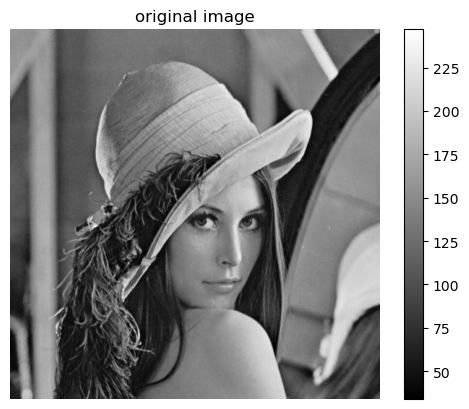

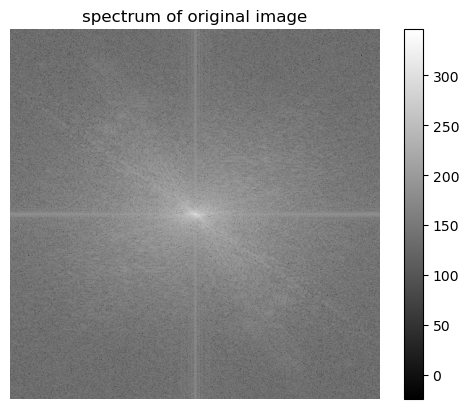

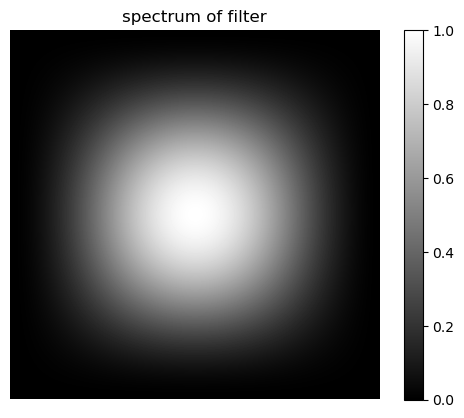

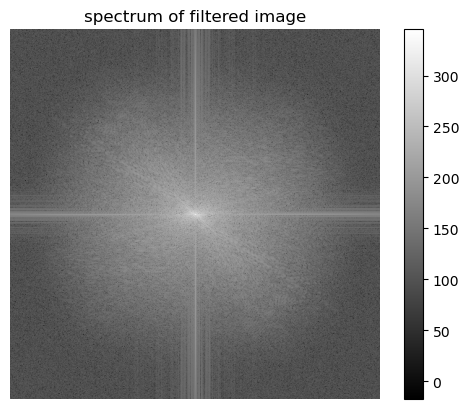

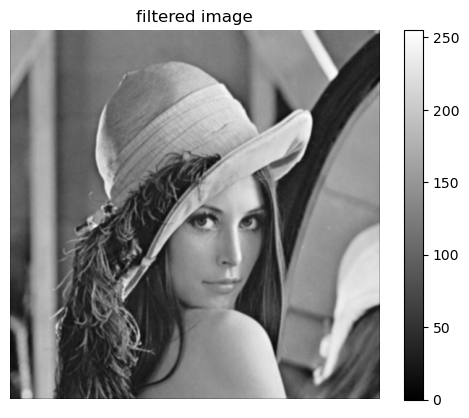

In [5]:
H1 = 1/16*np.array([[1,2,1],[2,4,2],[1,2,1]])
plot_filtering(image, H1)

This is a low pass filter and it can be used for noise removal or image smoothing. The fitered image is blurrier and less grainy. The frequency resonse of the filter has values concentrated at the center. The frequency response of the image after the filtration is also more concentrated in the center compared to before the filtration.

![H2](1c_filters_H2.png)

(512, 512)


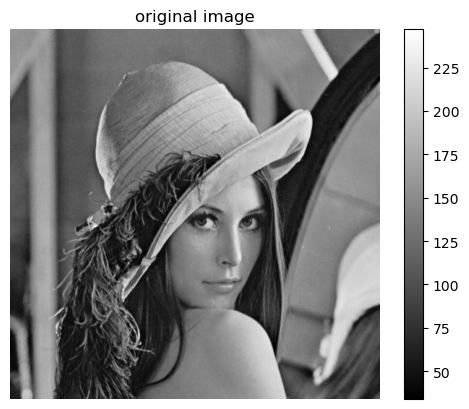

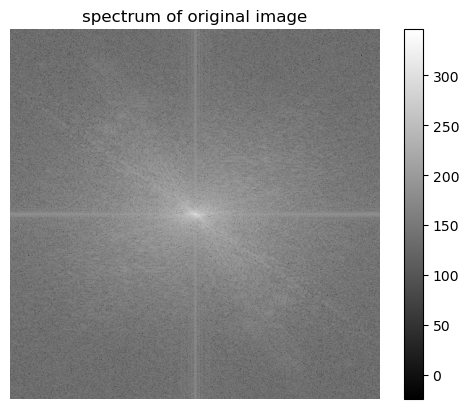

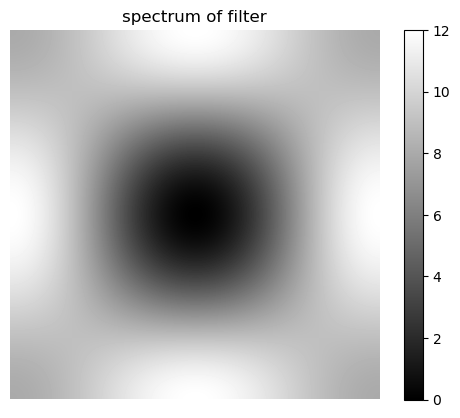

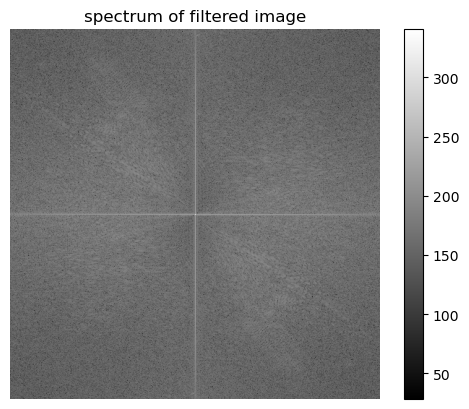

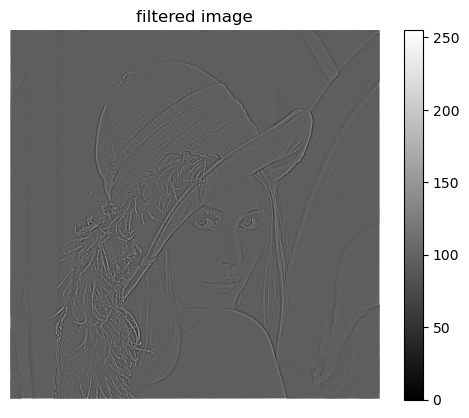

In [6]:
H2 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
plot_filtering(image, H2)

This is a high pass filter and is used for edge detection. The filtered image has removed most of the detail in the original image except for all of the edges irrespective of their orientation. The frequency response of the filter seems to has nothing in the center and lower values on the corners while higer values on the sides and top. This would indicate that the signal woould be best at detected horizonal and vertical edges and also diagonal edges. The frequency response of the filtered image also exhibits a similar trend compared to before filtering.
![H3](1c_filters_H3.png)

(512, 512)


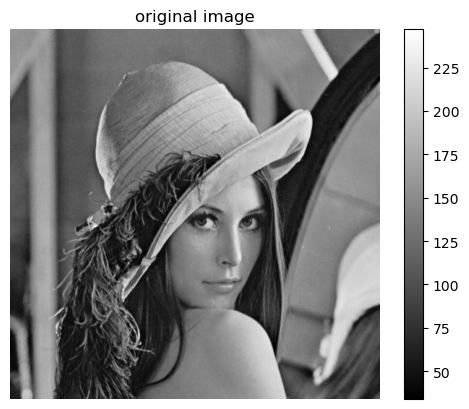

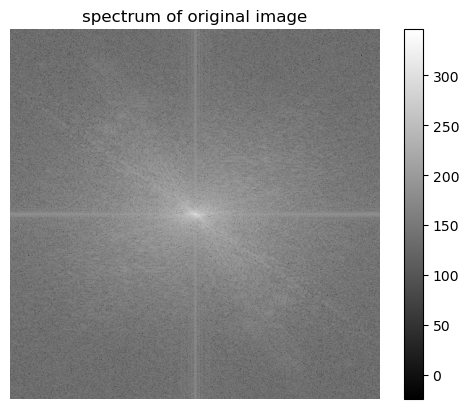

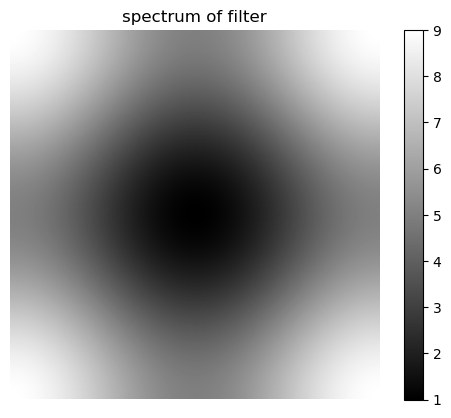

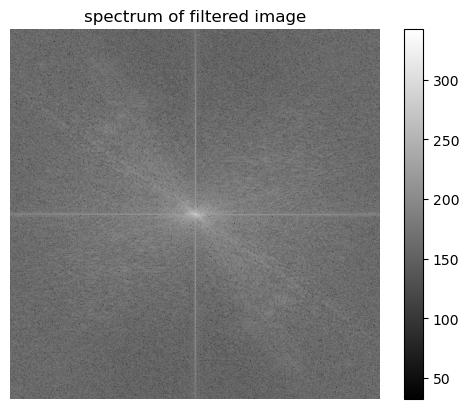

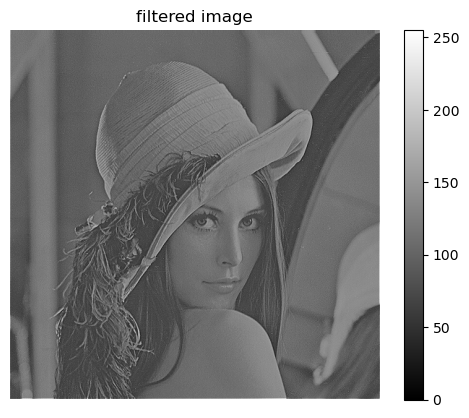

In [7]:
H3 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
plot_filtering(image, H3)

This is a high emphasis filter and is used for edge sharping. The filtered image has lower contrast than the |original image but more pronounced less blurry edges. The frequency response of the filter is lowest in the center and on the sides, while highest in the corners. In the frequency domain, the filtered image looks to have a much more distinction between the vertical and horizonal stright lines compared to other areas of the filtered image compared to before.

### **Problem 2**  (Image denoising with average and Gaussian filters).
#### (a) Write a function `awgn` that takes in an input image and noise-level and adds i.i.d<sup>2</sup> zero-mean Gaussian random noise with standard-deviation.

In [8]:
def awgn(image,sigma):
    image = image + sigma*np.random.randn(np.shape(image)[0],np.shape(image)[1])
    return (image-np.amin(image))*1/(np.amax(image)-np.amin(image))

#### (b) Write a `function gaussian_filter` which returns a 2D Gaussian filter of size m x m.

In [9]:
def gaussian_filter(m,sigma):
    x = np.arange(-(m-1)/2,(m+1)/2)
    gauss = np.exp(-x**2/(2*sigma**2))
    gauss2 = np.empty((m,m))
    for i in range(m):
        for j in range(m):
            gauss2[i][j] = gauss[i]*gauss[j]
    return gauss2/np.sum(gauss2)

#### (c) Generate a noisy version of an image using awgn, with a noise-level an = 0:1 on an image intensity scale of [0, 1]. Apply separately a Gaussian filter of size 5 x 5 and average-filter of size 5 x 5, and comment on how the filters compare in their noise-removal, qualitatively. Repeat this for a few different noise-levels and filter sizes. Each time, calculate the PSNR<sup>3</sup> of your noisy and denoised images

In [10]:
def psnr(img1,img2):
    mse = ((img1-img2)**2).mean()
    return -10*np.log10(mse)

#### Generating a noisy version of an image with noise-level = 0.1, and a 5x5 filter

(512, 512)
(512, 512)


(-0.5, 511.5, 511.5, -0.5)

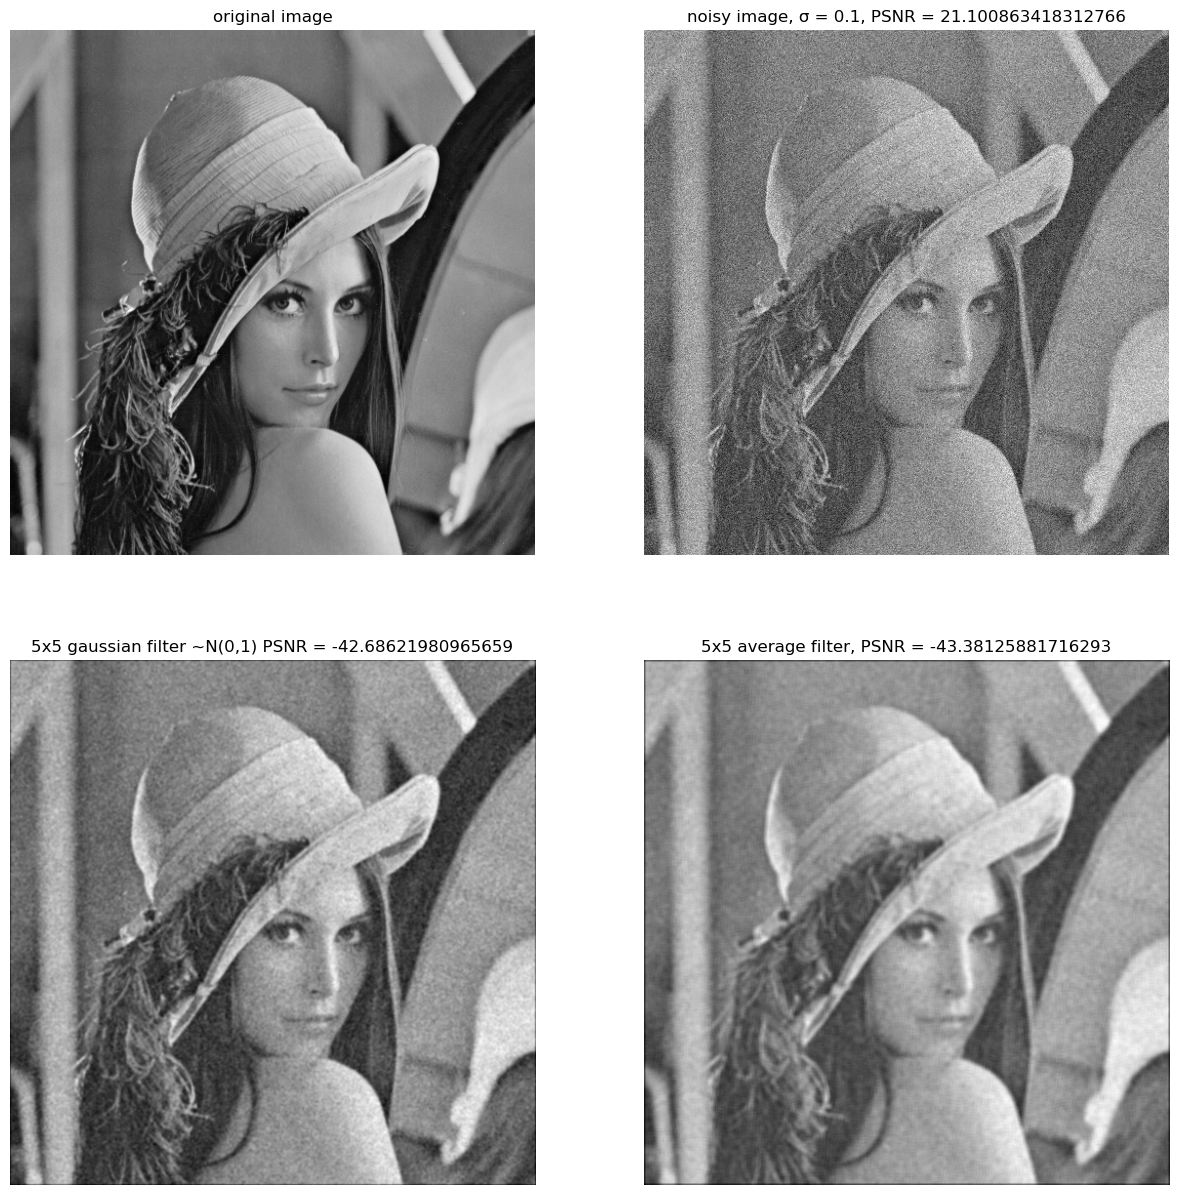

In [11]:
img = cv2.imread('lena_gray.bmp',0)
img = img/255 #Normalizing the image down to an intensity of [0,1]
img_noisy1 = awgn(img,0.1)
filt_gauss_5x5 = gaussian_filter(5,1)
filt_avg_5x5 = 1/25*np.ones((5,5))
plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title('original image')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(img_noisy1,cmap='gray')
plt.title('noisy image, σ = 0.1, PSNR = '+str(psnr(img,img_noisy1)))
plt.axis('off')
plt.subplot(2,2,3)
img_gauss = conv2(img_noisy1,filt_gauss_5x5)
plt.imshow(img_gauss,cmap='gray')
plt.title('5x5 gaussian filter ~N(0,1) PSNR = '+str(psnr(img,img_gauss)))
plt.axis('off')
plt.axis('off')
plt.subplot(2,2,4)
img_avg = conv2(img_noisy1,filt_avg_5x5)
plt.imshow(img_avg,cmap='gray')
plt.title('5x5 average filter, PSNR = '+str(psnr(img,img_avg)))
plt.axis('off')
plt.axis('off')

#### Different Noise Levels

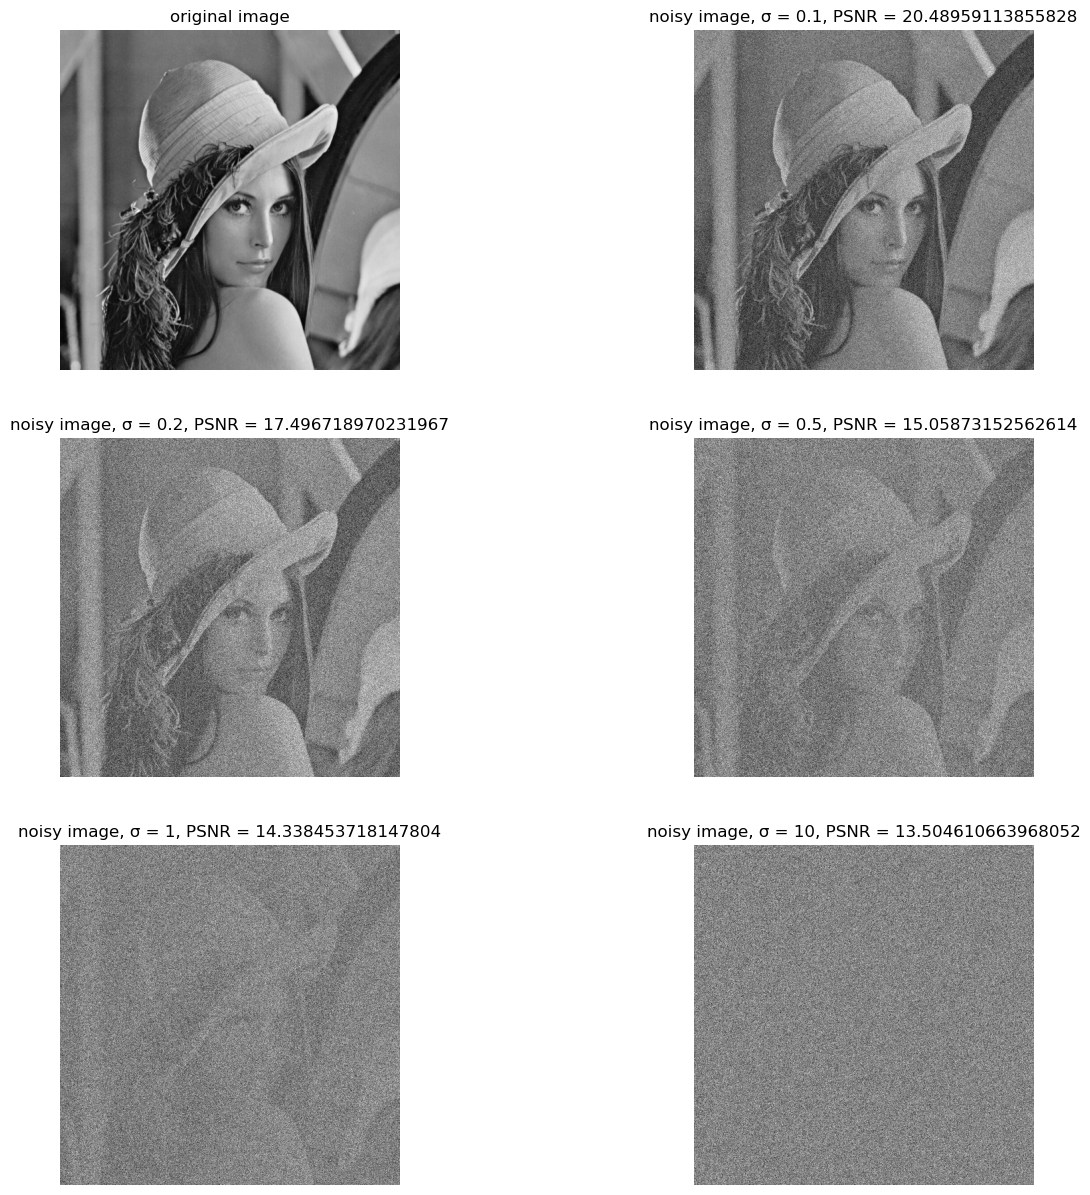

In [12]:
noise_levels = [0.1, 0.2, 0.5, 1, 10]
plt.figure(figsize = (15,15))
plt.subplot(3,2,1)
plt.imshow(img,cmap='gray')
plt.title('original image')
plt.axis('off')
s = 2
for n in noise_levels:
    img_noisy = awgn(img,n)
    plt.subplot(3,2,s)
    plt.imshow(img_noisy,cmap='gray')
    plt.title('noisy image, σ = '+str(n)+', PSNR = '+str(psnr(img,img_noisy)))
    plt.axis('off')
    s += 1

#### Different Gauss Filters Sizes

(512, 512)
(512, 512)
(512, 512)
(512, 512)


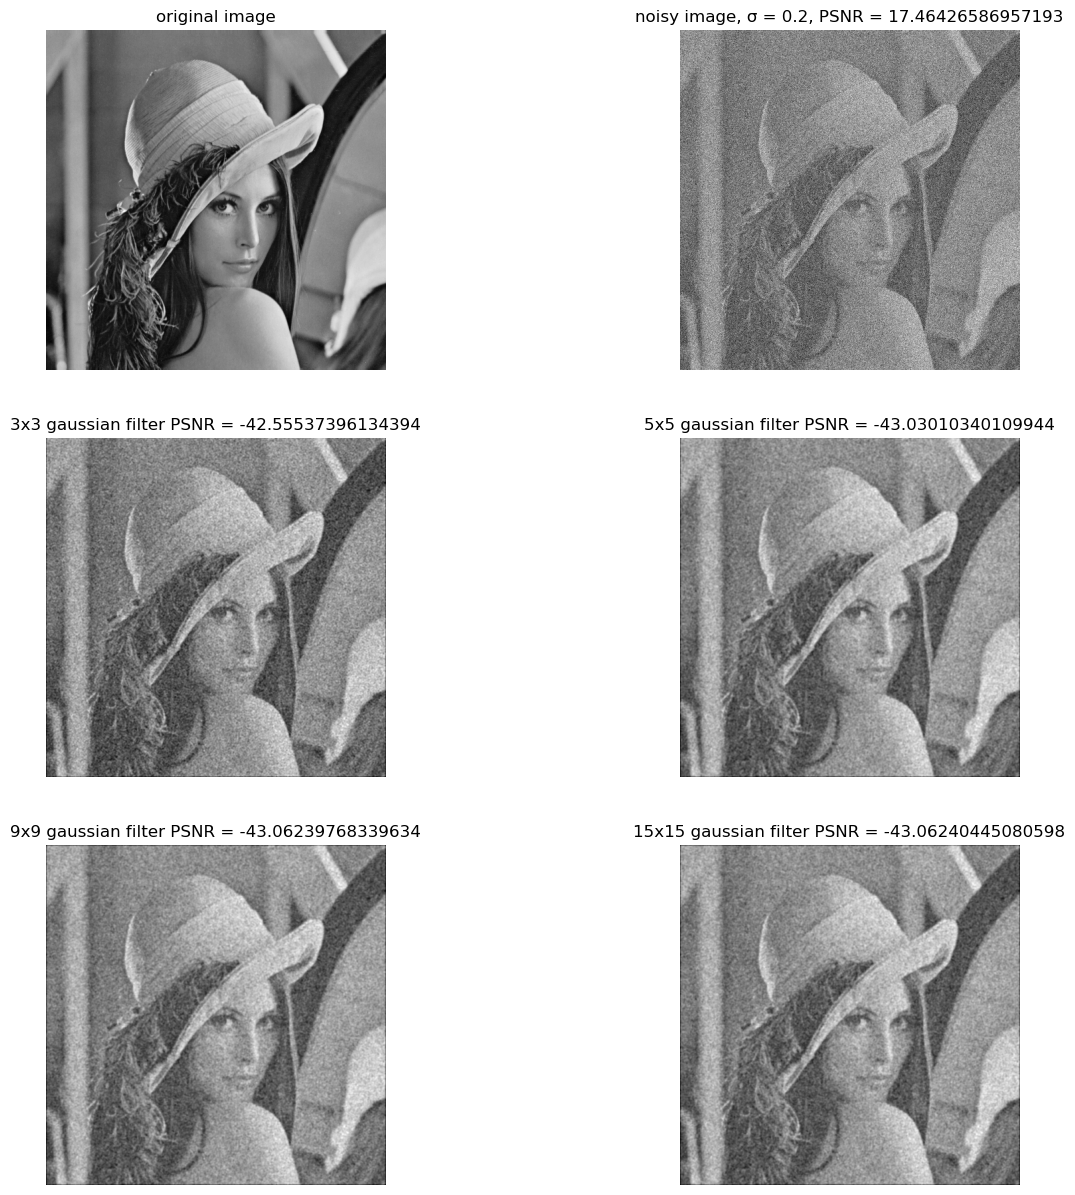

In [13]:
filer_sizes = [3, 5, 9, 15]
plt.figure(figsize = (15,15))
plt.subplot(3,2,1)
plt.imshow(img,cmap='gray')
plt.title('original image')
plt.axis('off')
img_noisy = awgn(img,0.2)
plt.subplot(3,2,2)
plt.imshow(img_noisy,cmap='gray')
plt.title('noisy image, σ = '+str(0.2)+', PSNR = '+str(psnr(img,img_noisy)))
plt.axis('off')
s = 3
for f in filer_sizes:
    filt = gaussian_filter(f,1)
    img_gauss = conv2(img_noisy,filt)
    plt.subplot(3,2,s)
    plt.imshow(img_gauss,cmap='gray')
    plt.title(str(f)+'x'+str(f)+ ' gaussian filter PSNR = '+str(psnr(img,img_gauss)))
    plt.axis('off')
    s += 1

#### Different Average Filters Sizes

(512, 512)
(512, 512)
(512, 512)
(512, 512)


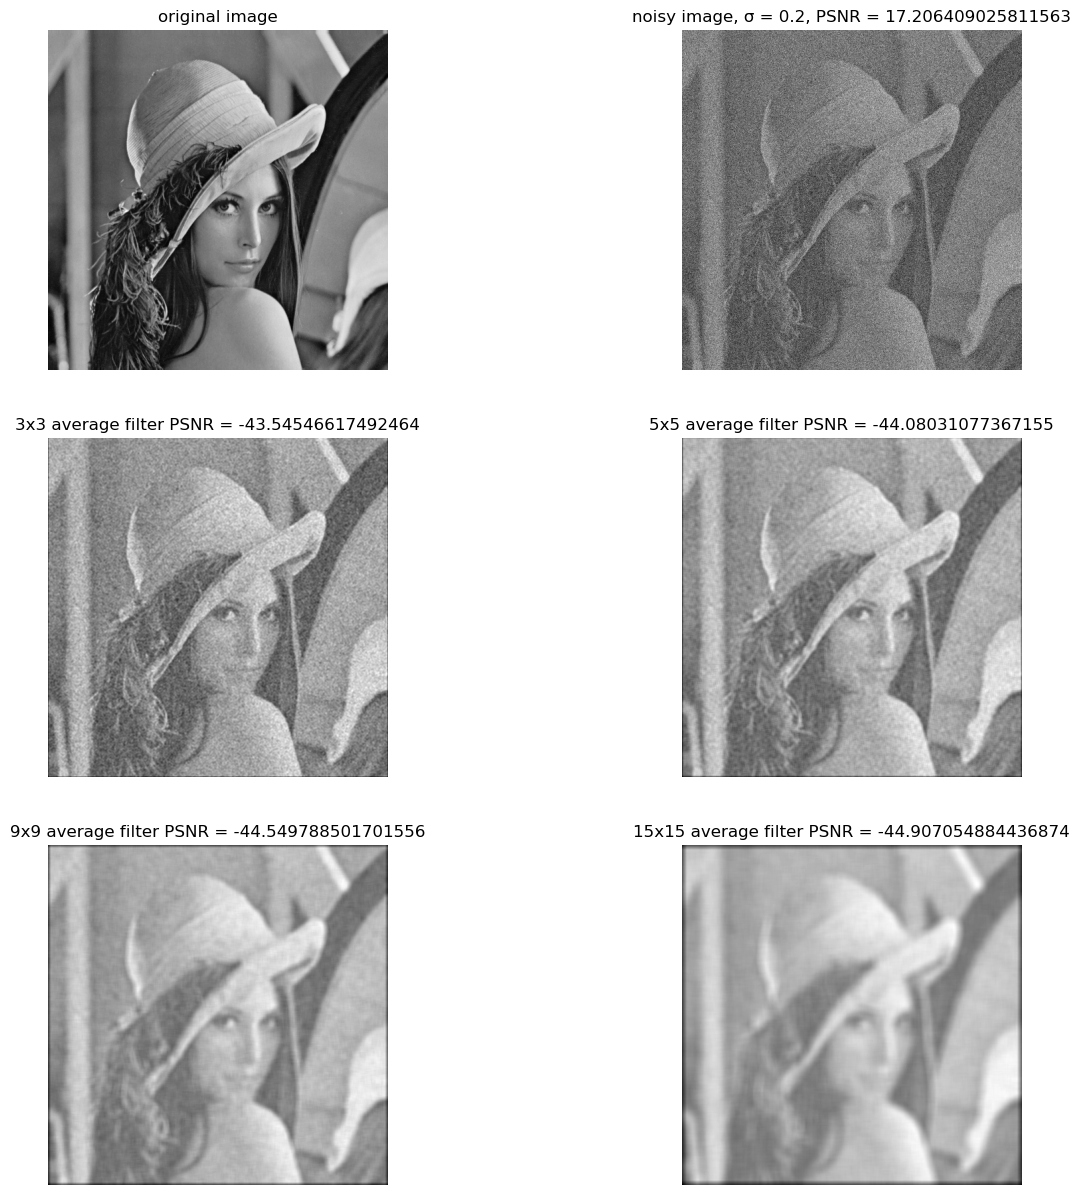

In [14]:
plt.figure(figsize = (15,15))
plt.subplot(3,2,1)
plt.imshow(img,cmap='gray')
plt.title('original image')
plt.axis('off')
img_noisy = awgn(img,0.2)
plt.subplot(3,2,2)
plt.imshow(img_noisy,cmap='gray')
plt.title('noisy image, σ = '+str(0.2)+', PSNR = '+str(psnr(img,img_noisy)))
plt.axis('off')
s = 3
for f in filer_sizes:
    filt = filt = (1/f**2)*(np.ones([f,f]))
    img_avg = conv2(img_noisy,filt)
    plt.subplot(3,2,s)
    plt.imshow(img_avg,cmap='gray')
    plt.title(str(f)+'x'+str(f)+ ' average filter PSNR = '+str(psnr(img,img_avg)))
    plt.axis('off')
    s += 1